<h1><b>Исследование рынка заведений общественного питания Москвы</h1></b>

# Описание проекта

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
Нужно подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.


# Цель исследования

- изучить рынок общественного питания по категориям
- изучить рынок по районам
- отдельно выделить кофейни, изучить информацию по ним
- дать рекомендацию для открытия нового заведения

# Ход исследования 

Данные я получу из файла /datasets/moscow_places.csv. Далее я проведу обзор данных и их предобработку.

этапы исследования:
 - обзор данных
 - предобработка данных
 - исследование  объектов общественного питания по категориям
 - изучение сетевых и несетевых заведений
 - изучение заведений по районам
 - исследование средних рейтингов заведений
 - изучение средних чеков
 - отдельное изучение кофеен



## ШАГ 1. обзор данных

In [56]:
#импортируем бибилиотеки
import pandas as pd
import warnings
import folium
from folium import Map, Marker
from folium.plugins import MarkerCluster
from folium import Map, Choropleth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [57]:
places = pd.read_csv('https://code.s3.yandex.net/datasets/moscow_places.csv')

In [58]:
places.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [59]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [60]:
len(places['name'])

8406

всего имеется 8406 заведений. Известно название, категория, адрес, рейтинг, район,часы работы,средние цены, количество мест, и является ли заведение сетевым. В данных есть пропуски. Представлены данные трёх типов: object, int64, float64

## ШАГ 2. Предобработка данных

### работа с пропусками

In [61]:
places.duplicated().sum()

0

In [62]:
places.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

В данных встречаются пропуски.

In [63]:
for col in (places.columns):
    print('В столбце',col,round( places.isna().sum()[col] / len(places[col])*100,2),'% пропусков')

В столбце name 0.0 % пропусков
В столбце category 0.0 % пропусков
В столбце address 0.0 % пропусков
В столбце district 0.0 % пропусков
В столбце hours 6.38 % пропусков
В столбце lat 0.0 % пропусков
В столбце lng 0.0 % пропусков
В столбце rating 0.0 % пропусков
В столбце price 60.56 % пропусков
В столбце avg_bill 54.6 % пропусков
В столбце middle_avg_bill 62.54 % пропусков
В столбце middle_coffee_cup 93.64 % пропусков
В столбце chain 0.0 % пропусков
В столбце seats 42.96 % пропусков


In [64]:
places['seats'].corr(places['middle_avg_bill'])

0.0824289311743684

В столбце hours небольшое количество пропусков, можно их не заполнять. Больше всего пропусков в столбце middle_coffee_cup. Возможно, в этих заведениях нет кофе, то есть они не являются кофейнями. Так же больше половины пропусков в столбцах price, avg_bill, middle_avg_bill. В столбце middle_coffee_cup может быть много пропусков, потому что далеко не во всех общепитах есть в меню капучино. Столбец seats заполнить не получится, так как нет предположений от чего может зависеть количество посадочных мест. Оставим пропуски, чтобы избежать искажения в данных 

### добавление столбцов

In [65]:
places['street'] = places['address'].str.split(', ').str[1]

In [66]:
places['is_24/7'] = places['hours'].str.contains('ежедневно, круглосуточно')

In [67]:
places['is_24/7'] 

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24/7, Length: 8406, dtype: object

### работа с дубликатами

In [68]:
dubl = places.duplicated(subset=['name','address'])

In [69]:
dubl = dubl[dubl==True]

In [70]:
len(dubl)

0

неявных дубликатов среди названий заведений и адресу нет

In [71]:
dubl_address = places.duplicated(subset=['address'])
dubl_address = dubl_address[dubl_address==True]
len(dubl_address)

2653

Есть дубликаты по адресу. Возможно, по этим адресам находится несколько заведений

мы изучили структуру данных, нет явных дубликатов, изучили неявные дубликаты и посмотрели пропуски. Были добавлены столбцы с названием улиц и обозначением, круглосуточное заведение или нет

## Шаг 3. Анализ данных

### анализ категорий заведений

In [72]:
places['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Всего есть 8 категорий

In [73]:
type_cat = places.groupby('category')['address'].count().sort_values(ascending=True).reset_index()
type_cat

,category,address
0,булочная,256
1,столовая,315
2,быстрое питание,603
3,пиццерия,633
4,"бар,паб",765
5,кофейня,1413
6,ресторан,2043
7,кафе,2378


In [74]:
fig = px.bar(type_cat, x='address', y='category', title='Распределение количества заведений по категориям')
fig.update_xaxes(tickangle=45)
fig.show() 

Больше всего заведений в категориях ресторан и кафе. Далее идёт категория кофейня. Меньше всего булочных и столовых.

### анализ количества посадочных мест

In [75]:
kol_seats = places.pivot_table(index='category', values='seats', aggfunc=['mean', 'median']).reset_index()

In [76]:
kol_seats.columns=['category','mean_seats','median_seats']

In [77]:
kol_seats

,category,mean_seats,median_seats
0,"бар,паб",124.532051,82.5
1,булочная,89.385135,50.0
2,быстрое питание,98.891117,65.0
3,кафе,97.512315,60.0
4,кофейня,111.199734,80.0
5,пиццерия,94.496487,55.0
6,ресторан,121.944094,86.0
7,столовая,99.750000,75.5


In [78]:
fig = px.bar(kol_seats.sort_values(by='median_seats'), x='median_seats', y='category', title='среднее количество мест по категориям')
fig.update_xaxes(tickangle=45)
fig.show() 

Больше всего мест в барах, ресторанах и кофейнях. Меньше всего - в булочных и пиццериях. Среднее и медианные значения сильно отличаются

### анализ количества сетевых и несетевых заведений

In [79]:
pd.options.mode.chained_assignment = None
chain_group = places.groupby('chain')['address'].count().sort_values(ascending=False).reset_index()
chain_group['chain'][0] = 'несетевые'
chain_group['chain'][1] = 'сетевые'
chain_group

,chain,address
0,несетевые,5201
1,сетевые,3205


In [80]:
fig = go.Figure(data=[go.Pie(labels=chain_group['chain'], values=chain_group['address'])])
fig.update_layout(title='Доли сетевых и несетевых заведений')          
fig.show() 

Сетевые заведения составляют 38,1% от общего количества. Несетевых заведений больше примерно в 1,5 раза

#### сетевые категории

In [81]:
chain_places = places[places['chain'] ==1]
chain_places_2 = chain_places.groupby(by='category')['address'].count().sort_values(ascending=False).reset_index()
chain_places_2

,category,address
0,кафе,779
1,ресторан,730
2,кофейня,720
3,пиццерия,330
4,быстрое питание,232
5,"бар,паб",169
6,булочная,157
7,столовая,88


In [82]:
type_cat = type_cat.sort_values(by='address',ascending=False)
type_cat

,category,address
7,кафе,2378
6,ресторан,2043
5,кофейня,1413
4,"бар,паб",765
3,пиццерия,633
2,быстрое питание,603
1,столовая,315
0,булочная,256


In [83]:
share = chain_places_2.merge(type_cat[['address', 'category']], on = 'category', how = 'left')

In [84]:
share

,category,address_x,address_y
0,кафе,779,2378
1,ресторан,730,2043
2,кофейня,720,1413
3,пиццерия,330,633
4,быстрое питание,232,603
5,"бар,паб",169,765
6,булочная,157,256
7,столовая,88,315


In [85]:
share['share_of_chain'] = share['address_x'] / share['address_y'] *100
share = share.sort_values(by='share_of_chain')
share

,category,address_x,address_y,share_of_chain
5,"бар,паб",169,765,22.091503
7,столовая,88,315,27.936508
0,кафе,779,2378,32.758621
1,ресторан,730,2043,35.731767
4,быстрое питание,232,603,38.474295
2,кофейня,720,1413,50.955414
3,пиццерия,330,633,52.132701
6,булочная,157,256,61.328125


In [86]:
fig = px.bar(share, x='share_of_chain', y='category', title=' доля сетевых заведений по категориям')
fig.update_xaxes(tickangle=45)
fig.show()

Больше всего сетевых заведений в категориях булочная, пиццерия и кофейня. Меньше всего в категории бар,паб

#### топ-15 популярных сетей в Москве

In [87]:
top_15 = chain_places.pivot_table(index='name', values='address', aggfunc=['count']).reset_index()
top_15.columns=['name','count']
top_15 = top_15.sort_values(by='count',ascending=False)
top_15 = top_15.head(15)
top_15

,name,count
746,Шоколадница,120
344,Домино'с Пицца,76
340,Додо Пицца,74
148,One Price Coffee,71
759,Яндекс Лавка,69
59,Cofix,65
170,Prime,50
679,Хинкальная,44
378,КОФЕПОРТ,42
431,Кулинарная лавка братьев Караваевых,39


In [88]:
fig = px.bar(top_15, x='name', y='count', title='Топ 15 сетевых заведений')
fig.update_xaxes(tickangle=45)
fig.show()

In [89]:
arr_top = top_15['name']

In [90]:
chain_places.query('name in @arr_top').groupby(by='name')['category'].unique()

name
CofeFest                                                                 [кофейня, кафе]
Cofix                                                                          [кофейня]
One Price Coffee                                                               [кофейня]
Prime                                                                   [ресторан, кафе]
Буханка                                                        [булочная, кофейня, кафе]
Додо Пицца                                                                    [пиццерия]
Домино'с Пицца                                                                [пиццерия]
КОФЕПОРТ                                                                       [кофейня]
Кулинарная лавка братьев Караваевых                                               [кафе]
Му-Му                                  [кафе, ресторан, кофейня, быстрое питание, пиц...
Теремок                                                      [ресторан, быстрое питание]
Хинкальная      

Наибольшую долю в Москве занимают Шоколадница, Домино'с Пицца, Додо Пицца. Это известные сети питания по всей России. С ними будет сложно конкурировать. Среди топа заведений имеются следующие категории: кафе, кофейня, ресторан, пиццерия

### изучение заведение по районам Москвы

In [91]:
places['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В датасете есть информация о 9 районах Москвы

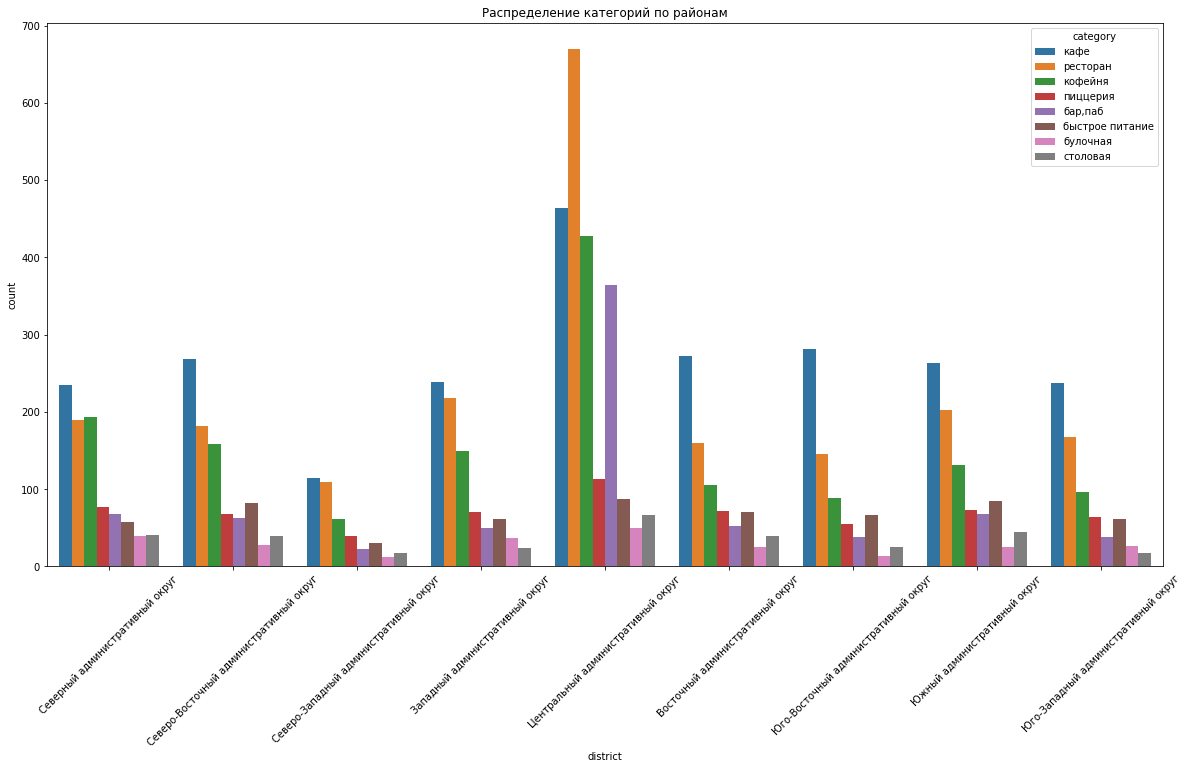

In [92]:
plt.figure(figsize=(20, 10))
sns.countplot(x='district', hue='category', data=places)
plt.xticks(rotation=45)
plt.title('Распределение категорий по районам')
plt.show()

В центральном районе больше всего заведений, а меньше всего в северо-западном. Во всех районах кроме центрального больше всего кафе, но в центральном больше всего ресторанов. По сравнению с другими районами в центральном много баров. Наименьшую долю во всех районах занимают булочные и столовые. 

### средний рейтинг по категориям

In [93]:
cat_rat= places.groupby('category')['rating'].mean()
cat_rat = cat_rat.reset_index()
cat_rat.columns=['category','rating']
cat_rat

,category,rating
0,"бар,паб",4.387712
1,булочная,4.268359
2,быстрое питание,4.050249
3,кафе,4.123886
4,кофейня,4.277282
5,пиццерия,4.301264
6,ресторан,4.290357
7,столовая,4.211429


In [94]:
fig = px.bar(cat_rat.sort_values(by='rating'), x='category', y='rating', title='средний рейтинг по категориям')
fig.update_xaxes(tickangle=45)
fig.show()

Самый высокий рейтинг у баров и пабов, а самый низкий - у быстрого питания. Рейтинг кофеен находится по середине. Рейтинги различаются несильно. Находятся в диапазоне от 4,05 до 4,39.

### средний рейтинг  по районам

In [95]:
rating = places.groupby('district', as_index=False)['rating'].agg('mean')
rating

,district,rating
0,Восточный административный округ,4.174185
1,Западный административный округ,4.181551
2,Северный административный округ,4.239778
3,Северо-Восточный административный округ,4.148260
4,Северо-Западный административный округ,4.208802
5,Центральный административный округ,4.377520
6,Юго-Восточный административный округ,4.101120
7,Юго-Западный административный округ,4.172920
8,Южный административный округ,4.184417


Самые хорошие рейтинги в Центральном районе, а самые низкие - в юго-восточном. 

In [ ]:
from folium import Map, Marker
from folium.plugins import MarkerCluster

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
places.apply(create_clusters, axis=1)

# выводим карту
m

In [ ]:
from folium import Map, Choropleth

state_geo = '/datasets/admin_level_geomap.geojson'

moscow_lat, moscow_lng = 55.751244, 37.618423

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Choropleth(
    geo_data=state_geo,
    data=rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='средний рейтинг заведений по районам',
).add_to(m)

m

В центральном районе заведений значительно больше

### топ-15 улиц по количеству заведений

In [97]:
top_street = places.pivot_table(index='street', values='name', aggfunc='count').sort_values(by='name', ascending=False).head(15)
top_street = top_street.reset_index()
top_streets = top_street['street']

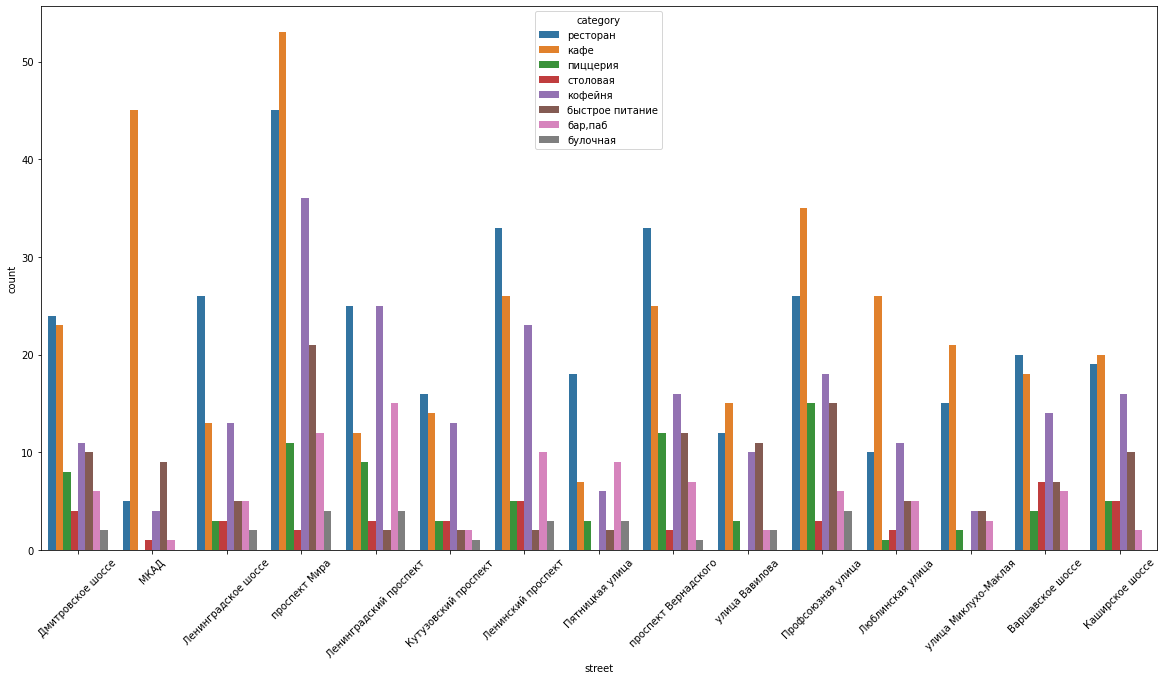

In [98]:
top_str = places.query('street in @top_streets')
plt.figure(figsize=(20, 10))
sns.countplot(x='street', hue='category', data=top_str)
plt.xticks(rotation=45)
plt.show()

На улице МКАД кафе занимают наибольшую долю по сравнению с другими районами. Возможно, это связано с придорожными кафе. Так же возможно МКАД оказался в топе из-за своего размера. Больше всего кафе на проспекте Мира, Профсоюзной улице, Люблинской улице, улице Миклуко-Маклая. Лидер по заведениям - проспект Мира

### улицы, на которых находится только один объект общепита

In [99]:
one_street = places.pivot_table(index='street', values='name', aggfunc='count').sort_values(by='name')
one_street.columns = ['count']
one_street = one_street[one_street['count'] == 1]
len(one_street)

458

458 улиц с одним объектом общепита

In [100]:
one_streets = one_street.index
one_data = places.query('street in @one_streets')


In [101]:
one_data.groupby(by='category')['name'].count().sort_values()

category
булочная             8
пиццерия            15
быстрое питание     23
столовая            36
бар,паб             39
кофейня             84
ресторан            93
кафе               160
Name: name, dtype: int64

На этих улицах больше всего кафе, меньше всего булочных 

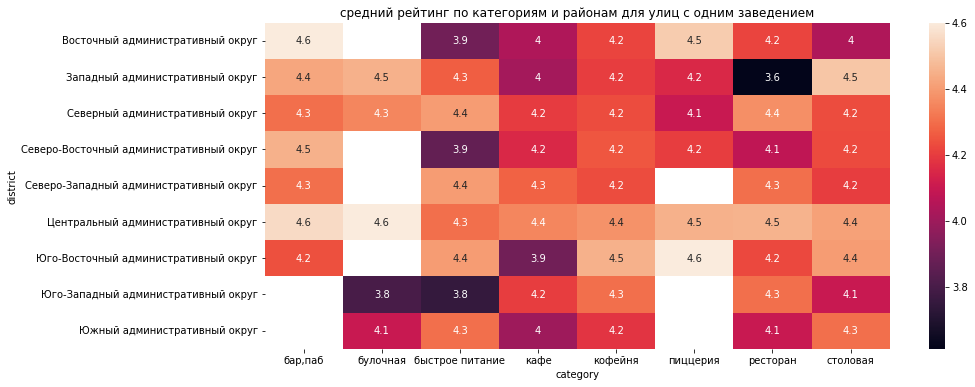

In [102]:
data = one_data.pivot_table(index='district', columns='category', values='rating', aggfunc='mean')
plt.figure(figsize=(14,6))
plt.title('средний рейтинг по категориям и районам для улиц с одним заведением')
sns.heatmap(data, annot=True)
plt.show()

У некоторых заведений отсутствует рейтинг. Самые низкие рейтинги у заведений в западном и юго-западном районах. Самые высокие - в центральном. Наиболее высокие рейтинги у баров, кофеен и пиццерий

### Анализ средних чеков заведений

In [ ]:
data_middle = places.groupby('district')['middle_avg_bill'].median()
data_middle = data_middle.reset_index()
data_middle.columns = ['district','median_middle_avg_bill']
Choropleth(
    geo_data=state_geo,
    data=data_middle,
    columns=['district', 'median_middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='средний чек заведений по районам',
).add_to(m)

m

In [104]:
data_middle.sort_values(by='median_middle_avg_bill')

,district,median_middle_avg_bill
6,Юго-Восточный административный округ,450.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
0,Восточный административный округ,575.0
7,Юго-Западный административный округ,600.0
2,Северный административный округ,650.0
4,Северо-Западный административный округ,700.0
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0


Самый высокий средний чек в западном и центральном округах. Самый низкий - в юго-восточном. Чем дальше от центра, тем цены ниже во всех направлениях кроме западного

ВЫВОДЫ:
 - Больше всего заведений в категориях ресторан и кафе. Далее идёт категория кофейня. Меньше всего булочных и столовых.
 - Самый популярный район – центральный. Так же в нём самые высокие цены
 - Больше всего мест нужно, чтобы открыть ресторан или бар. Меньше всего мест нужно для булочных. 
 - Сетевые заведения составляют 38,1% от общего количества. Несетевых заведений больше примерно в 1,5 раза
 - Больше всего сетевых заведений в категориях кафе, ресторан и кофейня. Меньше всего в категории столовая
 - В центральном районе больше всего заведений, а меньше всего в северо-западном. Во всех районах кроме центрального больше всего кафе, но в центральном больше всего ресторанов. По сравнению с другими районами в центральном много баров. Наименьшую долю во всех районах занимают булочные и столовые.
 - Самый высокий рейтинг у баров и пабов, а самый низкий - у быстрого питания. Рейтинг кофеен находится по середине. Рейтинги различаются несильно. Находятся в диапазоне от 4,05 до 4,39.
 - Наибольшую долю в Москве занимают Шоколадница, Домино'с Пицца, Додо Пицца. Это известные сети питания по всей России. Среди топа заведений имеются следующие категории: кафе, кофейня, ресторан, пиццерия
 - В центральном районе очень много ресторанов. В остальные районах больше предпочитают кафе, но ресторанов также много.
 - Самые высокие рейтинги в центральном районе, самые низкие в юго-восточном.
 - Лидер по заведениям - проспект Мира. Больше всего кафе на улице МКАД, что скорее всего связано с её протяжённостью и расположением
 - всего 458 улиц с одним объектом общепита. На этих улицах больше всего кафе, меньше всего булочных
 - Самый высокий средний чек в западном и центральном округах. Самый низкий - в юго-восточном. Чем дальше от центра, тем цены ниже во всех направлениях кроме западного


## ШАГ 4. открытие кофейни

### особенности расположения кофеен

In [105]:
coffee = places[places['category'] == 'кофейня']

In [106]:
len(coffee)

1413

In [107]:
coffee

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
45,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,Коровинское шоссе,False
46,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица Маршала Федоренко,False
52,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица Дыбенко,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,Назис Пури,кофейня,"Москва, Люблинская улица, 61",Юго-Восточный административный округ,"ежедневно, 09:00–22:00",55.684103,37.738588,4.5,NaN,NaN,NaN,NaN,0,NaN,Люблинская улица,False
8365,Квадрат кофе,кофейня,"Москва, Волгоградский проспект, 73, стр. 1",Юго-Восточный административный округ,"пн-пт 08:30–21:30; сб,вс 09:00–21:30",55.709710,37.744450,4.2,NaN,Цена чашки капучино:100–220 ₽,NaN,160.0,0,206.0,Волгоградский проспект,False
8376,Шоколад имбирь корица,кофейня,"Москва, Грайвороновская улица, 23",Юго-Восточный административный округ,пн-пт 09:30–19:30,55.721213,37.740755,4.1,NaN,NaN,NaN,NaN,0,NaN,Грайвороновская улица,False
8385,Cafio,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–22:00; сб,вс 07:00–21:00",55.724357,37.716415,4.7,NaN,Цена чашки капучино:80–120 ₽,NaN,100.0,0,NaN,Новохохловская улица,False


Всего 1413 кофеен

In [108]:
len(coffee)/ len(places['category']) * 100 

16.809421841541756

Кофейни составляют 16% от всех заведений

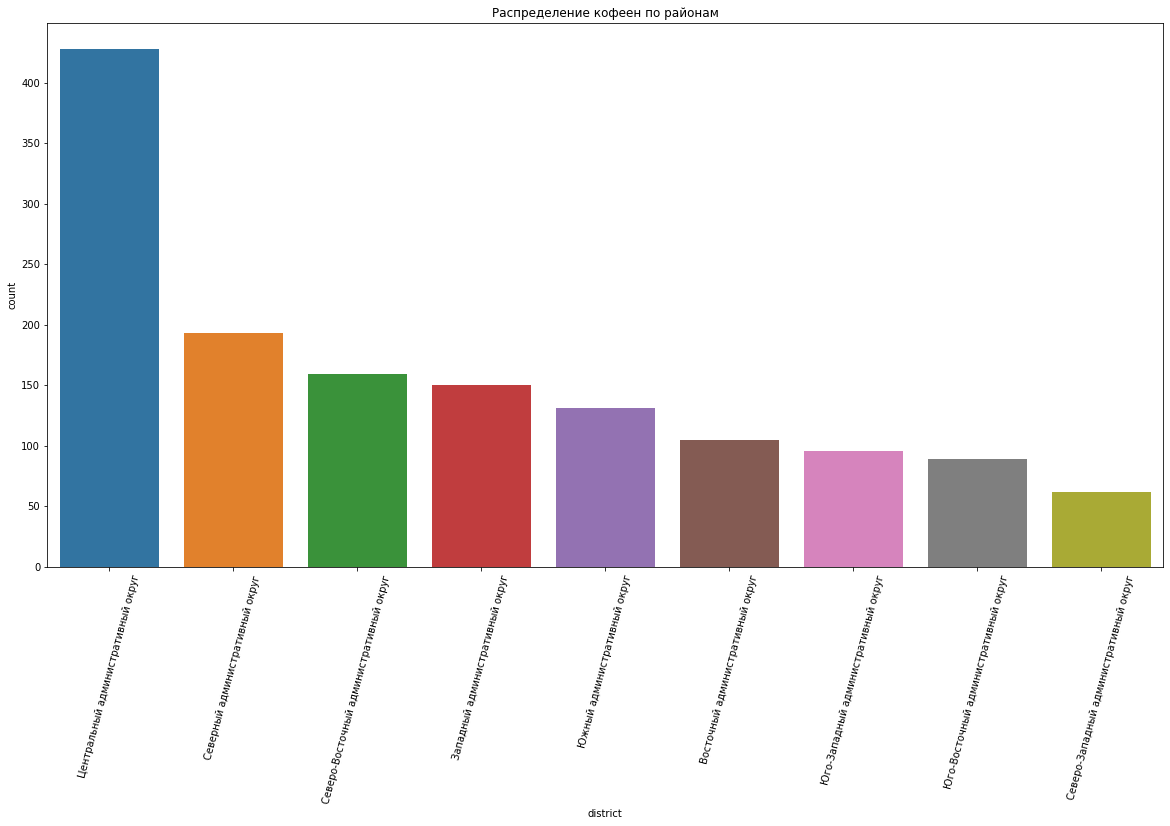

In [109]:
plt.figure(figsize=(20, 10))
large_to_small = coffee.groupby('district').size().sort_values().index[::-1]
sns.countplot(x='district', data=coffee, order=large_to_small)
plt.xticks(rotation=75)
plt.title('Распределение кофеен по районам')
plt.show()

Больше всего кофеен в центральном районе, а меньше всего - в северо-западном.

In [ ]:
coffee_2 = coffee.groupby('district')['name'].count().reset_index()
coffee_2.columns= ['district','count']
Choropleth(
    geo_data=state_geo,
    data=coffee_2,
    columns=['district', 'count'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='количество кофеен по районам',
).add_to(m)

m

In [111]:
coffee_2

,district,count
0,Восточный административный округ,105
1,Западный административный округ,150
2,Северный административный округ,193
3,Северо-Восточный административный округ,159
4,Северо-Западный административный округ,62
5,Центральный административный округ,428
6,Юго-Восточный административный округ,89
7,Юго-Западный административный округ,96
8,Южный административный округ,131


Количество кофеен во всех районах, кроме центрального от 62 до 200. В центральном их чуть больше 400. 

### Изучение круглосуточных кофеен

In [112]:
print('В Москве', len(coffee[coffee['is_24/7'] == True]), 'круглосуточных кофеен')

В Москве 59 круглосуточных кофеен


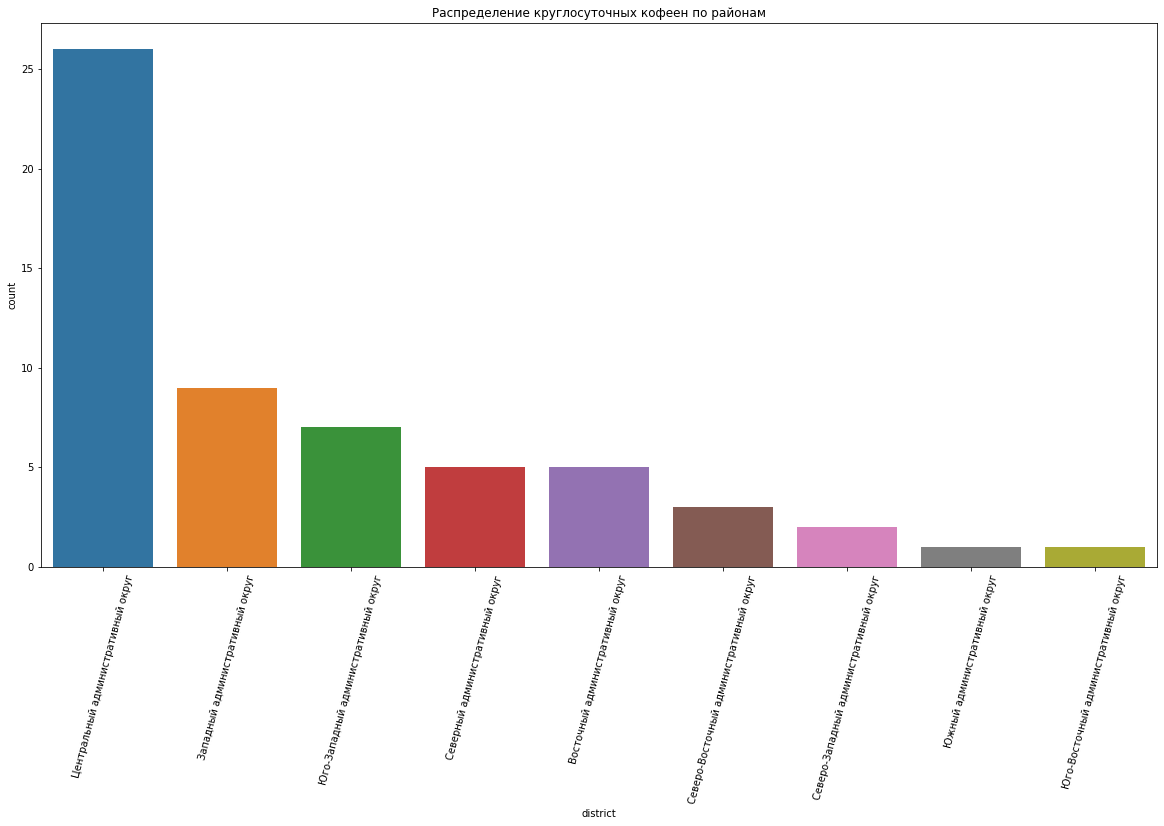

In [113]:
plt.figure(figsize=(20, 10))
coffee_24 = coffee[coffee['is_24/7']== True]
large = coffee_24.groupby('district').size().sort_values().index[::-1]
sns.countplot(x='district', data=coffee_24, order = large)
plt.xticks(rotation=75)
plt.title('Распределение круглосуточных кофеен по районам')
plt.show()

Круглосуточных кофеен немного. Почти половина из них находятся в центральном районе. Меньше всего их в юго-восточном и южном районах 

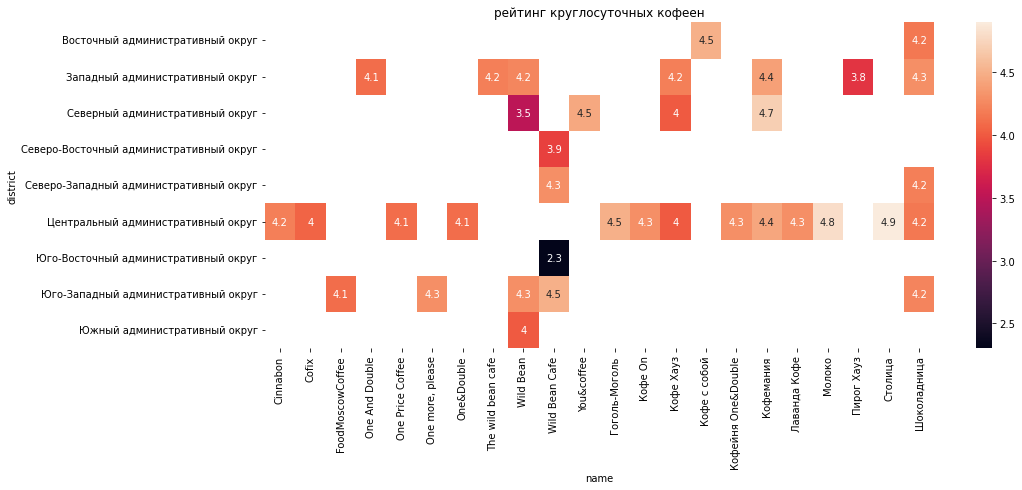

In [114]:
coffee_24_2 = coffee_24.pivot_table(index='district', columns='name', values='rating')
plt.figure(figsize=(15,6))
plt.title('рейтинг круглосуточных кофеен')
sns.heatmap(coffee_24_2, annot=True)
plt.show()

In [115]:
len(coffee_24['name'].unique())

22

In [116]:
coffee_24['rating'].mean()

4.206779661016949

В среднем рейтинг круглосуточных кофеен 4,2. Рейтинг каждой кофейни находится в диапазоне от 2,3 до 4,9. Есть сети кофеен, которые находятся в нескольких районах: шоколадница, кофемания, кофе хауз, wild bean cafe. Рейтинг сетевой кофейни wild bean cafe зависит от района. У остальных сетевых кофеен рейтинг не сильно отличается по районам. Самый высокий ретинг у кофейни столица.

### на какую стоимость чашки капучино следует ориентироваться

In [117]:
round(coffee['middle_coffee_cup'].median())

170

In [118]:
round(coffee['middle_coffee_cup'].mean())

175

стоит ориентироваться на стоимость чашки капучино от 170 до 175 рублей при открытии, потому что она является средней для всех кофеен. 

In [119]:
coffee[coffee['district']=='Центральный административный округ']['seats'].median()

86.0

In [120]:
coffee[coffee['district']=='Центральный административный округ']['seats'].mean()

113.14678899082568

следует ориентироваться на количестве мест от 86 до 113

## Общий вывод

ВЫВОДЫ И РЕКОМЕНДАЦИИ: <br>
Кофейни входят в список популярных заведений, поэтому открыть кофейню может быть прибыльно.<br> Лучше открывать кофейню в центральном районе, так как он самый популярный. <br>
Не стоит открывать кофейню в юго-восточном районе из-за низких рейтингов<br>
Лучше не открывать круглосуточную кофейню, их мало, и они не популярны. Ночью люди предпочитают бары<br>
Среди кофеен есть сетевые, с которыми будет сложно конкурировать<br>
Стоимость чашки капучино должна быть в среднем от 170 до 175 рублей.<br>
Следует ориентироваться на количестве мест от 86 до 113<br>





Презентация: https://disk.yandex.ru/d/Je7L199jYLUk7Q